In [ ]:
import numpy as np
import pandas as pd

In [129]:
df=pd.read_csv('placement.csv')

In [130]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [131]:
df=df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [132]:
ip= df.iloc[:,0:2]
ip

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [133]:
op=df.iloc[:,-1]
op

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [134]:
import matplotlib.pyplot as plt

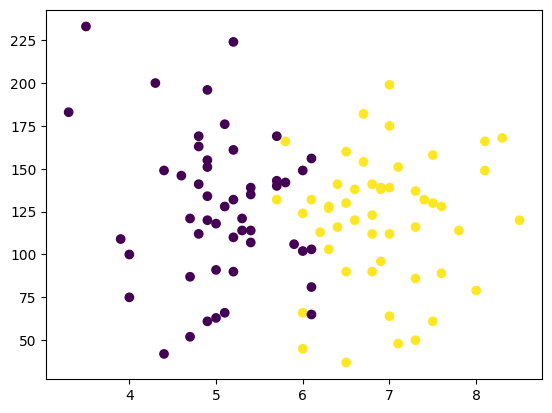

In [135]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [136]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test = train_test_split(ip,op,test_size=0.1)

In [137]:
ip_train

,cgpa,iq
9,5.1,66.0
71,6.1,132.0
11,6.9,138.0
41,5.4,114.0
35,6.8,90.0
...,...,...
49,5.4,135.0
67,5.0,118.0
12,5.4,139.0
73,4.9,61.0


In [138]:
ip_test

,cgpa,iq
13,6.4,116.0
34,4.8,163.0
20,6.6,120.0
15,5.1,176.0
90,7.3,86.0
87,5.7,132.0
1,5.9,106.0
93,6.8,112.0
81,5.4,107.0
2,5.3,121.0


In [139]:
op_train

,placement
9,0
71,1
11,1
41,0
35,1
...,...
49,0
67,0
12,0
73,0


In [140]:
op_test

,placement
13,1
34,0
20,1
15,0
90,1
87,1
1,0
93,1
81,0
2,0


In [141]:
from sklearn.preprocessing import StandardScaler


In [142]:
scaler =StandardScaler()

In [143]:
ip_train = scaler.fit_transform(ip_train)
ip_train

array([[-7.66589615e-01, -1.40311353e+00],
       [ 8.72849561e-02,  2.06172890e-01],
       [ 7.70384613e-01,  3.52471655e-01],
       [-5.10427243e-01, -2.32723407e-01],
       [ 6.84997156e-01, -8.17918468e-01],
       [-9.37364529e-01,  7.66984824e-01],
       [ 1.36809681e+00, -8.42301596e-01],
       [ 1.79503410e+00,  1.03519923e+00],
       [-1.10813944e+00, -1.74447732e+00],
       [-1.70585164e+00, -5.74087193e-01],
       [ 1.89749905e-03, -1.40311353e+00],
       [ 1.28270936e+00, -1.52502917e+00],
       [-6.81202158e-01,  2.06172890e-01],
       [ 1.11193444e+00, -1.79324357e+00],
       [ 1.11193444e+00, -1.83957151e-01],
       [ 1.72672413e-01, -2.57106534e-01],
       [-1.36430181e+00,  6.20686059e-01],
       [-1.02275199e+00,  4.25621038e-01],
       [-6.81202158e-01, -3.30255917e-01],
       [ 1.96580901e+00,  1.08396548e+00],
       [-1.10813944e+00, -6.20415135e-02],
       [-1.02275199e+00,  1.10834861e+00],
       [ 6.84997156e-01, -1.32752583e-02],
       [ 7.

In [144]:
ip_test=scaler.transform(ip_test)
ip_test

array([[ 0.34344733, -0.18395715],
       [-1.02275199,  0.96204984],
       [ 0.51422224, -0.08642464],
       [-0.76658961,  1.2790305 ],
       [ 1.11193444, -0.91545098],
       [-0.25426487,  0.20617289],
       [-0.08348996, -0.42778843],
       [ 0.68499716, -0.28148966],
       [-0.51042724, -0.4034053 ],
       [-0.5958147 , -0.06204151]])

In [145]:
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression()

In [146]:
clf.fit(ip_train,op_train)

LogisticRegression()

In [147]:
ip_pred=clf.predict(ip_test)
ip_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [148]:
op_test

,placement
13,1
34,0
20,1
15,0
90,1
87,1
1,0
93,1
81,0
2,0


In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(op_test,ip_pred)

0.9

In [150]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

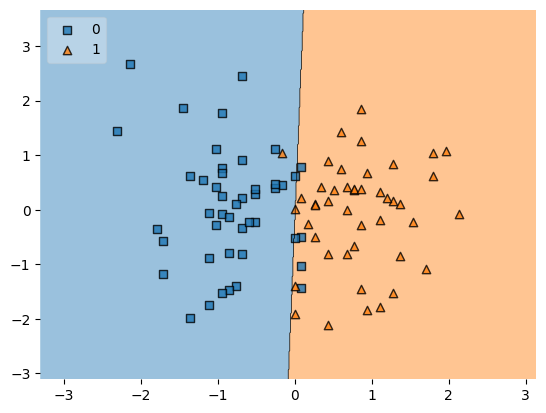

In [152]:
plot_decision_regions(ip_train,op_train.values,clf=clf,legend=2)

# New Section

# New Section